In [ ]:
# I will be using these packages over the course of the week
%matplotlib inline 
import os
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('bmh')
from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
import numpy as np
from sklearn.decomposition import TruncatedSVD # dimensionality reduction to pick out prominent features from sparse data. 

from geopandas import GeoSeries, GeoDataFrame;
from shapely.wkt import loads
import lightgbm # microsoft library for gradient boosted models useful for regression, classifications and other tasks


   FID  PUD_YR_AVG  PUD_JAN  PUD_FEB  PUD_MAR  PUD_APR  PUD_MAY  PUD_JUN  \
0    0         0.0      0.0      0.0      0.0      0.0      0.0      0.0   
1    1         0.0      0.0      0.0      0.0      0.0      0.0      0.0   
2    2         0.0      0.0      0.0      0.0      0.0      0.0      0.0   
3    3         0.0      0.0      0.0      0.0      0.0      0.0      0.0   
4    4         0.0      0.0      0.0      0.0      0.0      0.0      0.0   

   PUD_JUL  PUD_AUG  PUD_SEP  PUD_OCT  PUD_NOV  PUD_DEC  \
0      0.0      0.0      0.0      0.0      0.0      0.0   
1      0.0      0.0      0.0      0.0      0.0      0.0   
2      0.0      0.0      0.0      0.0      0.0      0.0   
3      0.0      0.0      0.0      0.0      0.0      0.0   
4      0.0      0.0      0.0      0.0      0.0      0.0   

                                            geometry  
0  POLYGON ((436865.7747709445 5206334.984202031,...  
1  POLYGON ((438365.7747709445 5206334.984202031,...  
2  POLYGON ((439865.774

/Users/markconrad/anaconda/envs/GIS/lib/python2.7/site-packages/ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in log


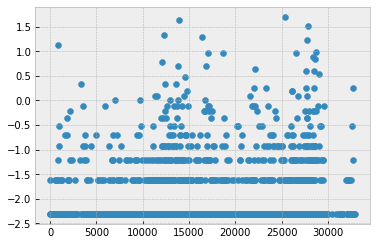

In [297]:
trails = gpd.read_file('pud_results_hex.shp')
gdf_trails = gpd.GeoDataFrame(trails)
print(gdf_trails.head())

background = gpd.read_file('rainierNP_boundary.shp')



#length of the first entry e.g. row vector
print(len(df_trails.columns))


# I am having trouble performing numpy operations (such as the vectorized implementation of the log transformation) on 
# geodataframes so I converted into a pandas dataframe.
df_trails = pd.DataFrame(gdf_trails)



# I want to create a function that returns the log transformation for each column to try to assuage the skewedness of the data.
def log_normalize(geodf, column):
    """This function uses a vectorized implementation log transformation on a pandas dataframe of the photos uploaded per day
    Parameters: 
    geodf = the dataframe to which we append a new column that includes the log transformation.
    df = column vector that matches the dimensions of the column that we are transforming.
    """
    
    df = np.log(geodf[column])
    
    geodf['log_normalize' + column] = df
    assert geodf['log_normalize' + column].shape == df.shape
    return(geodf['log_normalize' + column])


plt.scatter(df_trails['FID'],log_normalize(df_trails,'PUD_JAN'))

not quite a normal distribution...

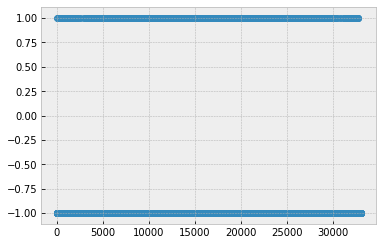

In [327]:
def z_score_normalize(geodf, column):
    """Here we are going to try another method to normalize the data, a common practice in statistics called computing the
    z-score.
    z-score = (sample - pop mean) / pop standard deviation"""
    
    geodf["zscore_" + column] = (np.array(geodf[column]) - np.average(geodf[column])) / np.sqrt(((np.average(geodf[column])  - np.array(geodf[column])))**2)
    assert geodf[column].shape == geodf["zscore_" + column].shape
    return geodf["zscore_" + column]

plt.scatter(df_trails['FID'],z_score_normalize(df_trails,'PUD_APR'))



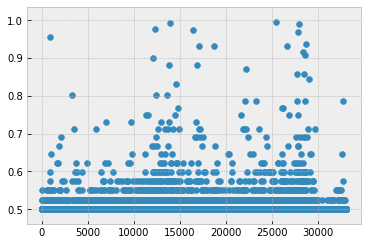

In [316]:
#I may have made a mistake, it looks like this is sort of binary, let's try sigmoid?

def sigmoid(df, column):
    return 1/(1+np.exp(-df[column]))
np_sig = sigmoid(df_trails, 'PUD_JAN')

plt.scatter(df_trails['FID'],(np_sig))



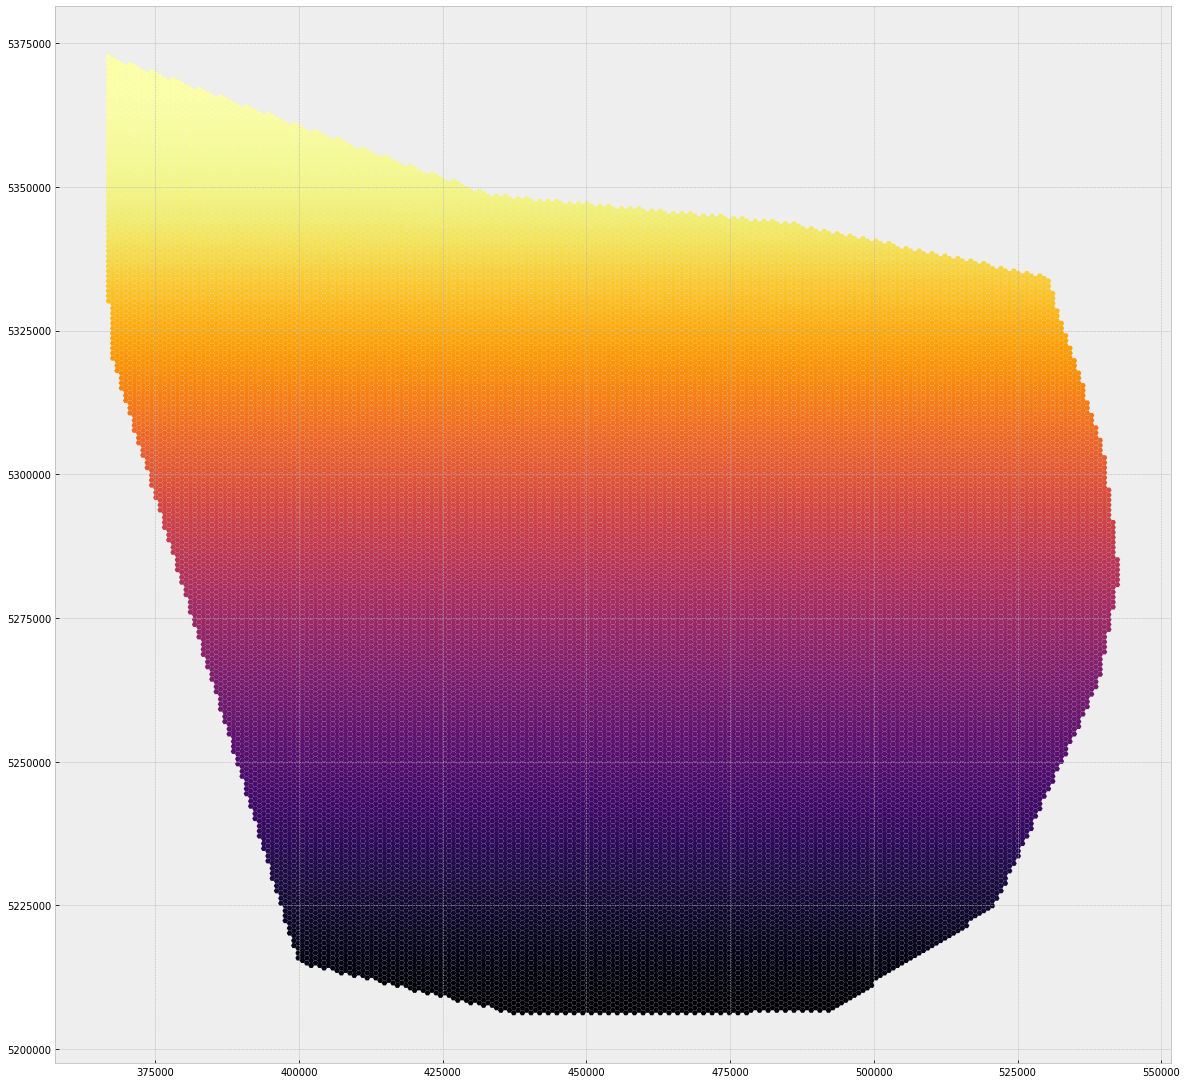

In [302]:
trails.plot(cmap='inferno', figsize =(20,20)); # very pretty graph that I don't really understand. 

Ideas... chloropleuth plot, results. log transformation on entire dataset to balance the data, omit columns that are not giving good information, maybe some form of regularization.
PCA, dimensionality reduction.
Binary, where a certain criteria returns a one otherwise a zero to reduce the sparsity in the data. 


#np.log(trails)


In [ ]:
print(background.crs); print(background.size)
print(trails.crs); print(trails.size)

In [ ]:
#trails.geometry.area
trails.crs
#trails.geometry.bounds

background.plot(ax=trails.plot(cmap='Set2', figsize=(10, 10)), facecolor='gray'); # Not very informative...

In [ ]:
array

In [ ]:
np.log(array)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
